# scDataset Benchmark Plots

This notebook generates plots for the scDataset paper.
The plots visualize throughput and batch entropy analysis from benchmark experiments.

In [1]:
import os
import sys

# Ensure we're in the benchmarks directory
os.chdir(os.path.dirname(os.path.abspath('__file__')))

from plot_utils import (
    plot_throughput,
    plot_batch_entropy,
    plot_block_size_by_fetch_factor,
    generate_all_benchmark_plots,
)

## 1. scDataset Throughput with AnnData

This plot shows the throughput (samples/second) of scDataset using AnnCollection
compared to the baseline AnnLoader with random sampling.

Figure saved to figures/throughput_anndata.pdf


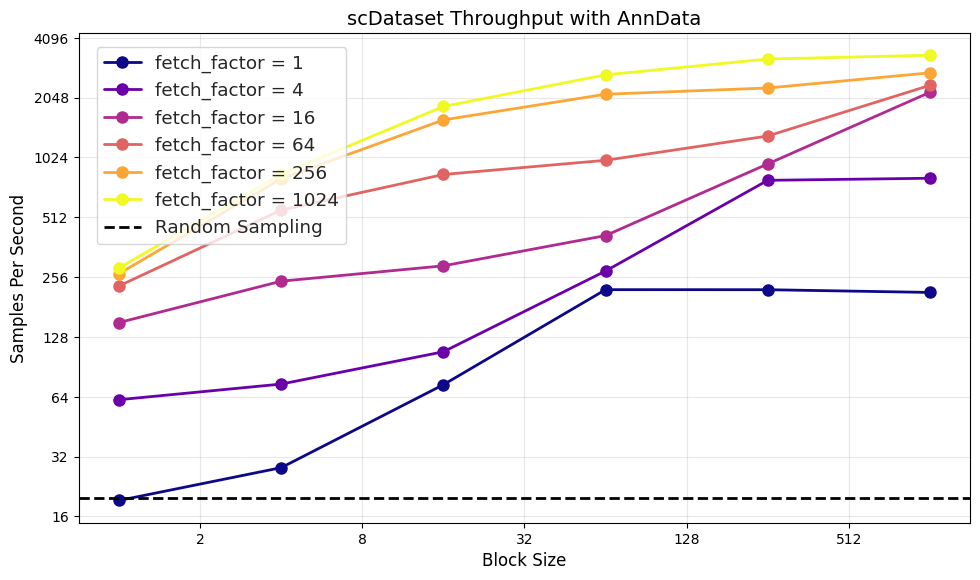

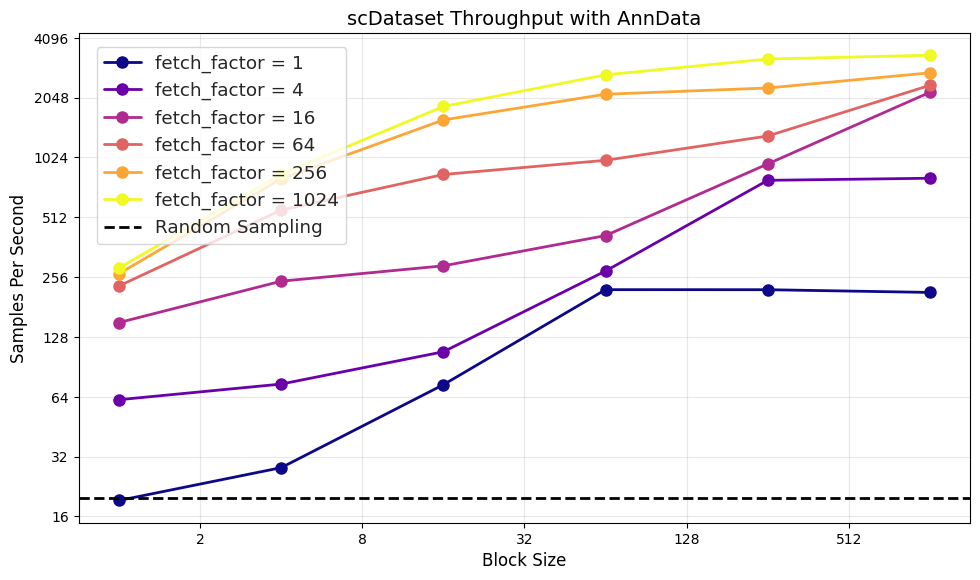

In [2]:
plot_throughput(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='scDataset Throughput with AnnData',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    baseline_label='Random Sampling',
    save_path='figures/throughput_anndata.pdf',
)

## 2. scDataset Throughput with HuggingFace

This plot shows the throughput of scDataset using HuggingFace Datasets
(Tahoe-100M) compared to the baseline PyTorch DataLoader.

Figure saved to figures/throughput_huggingface.pdf


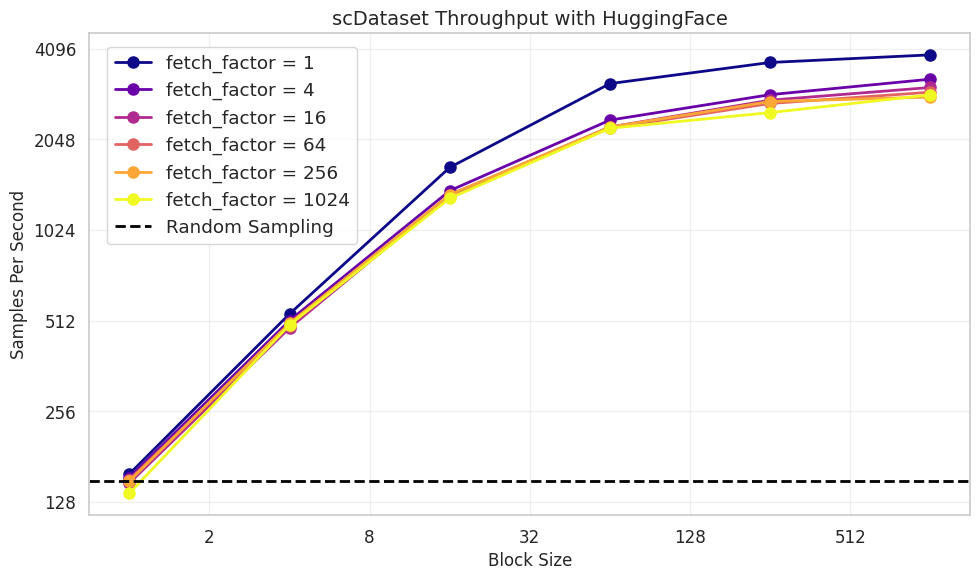

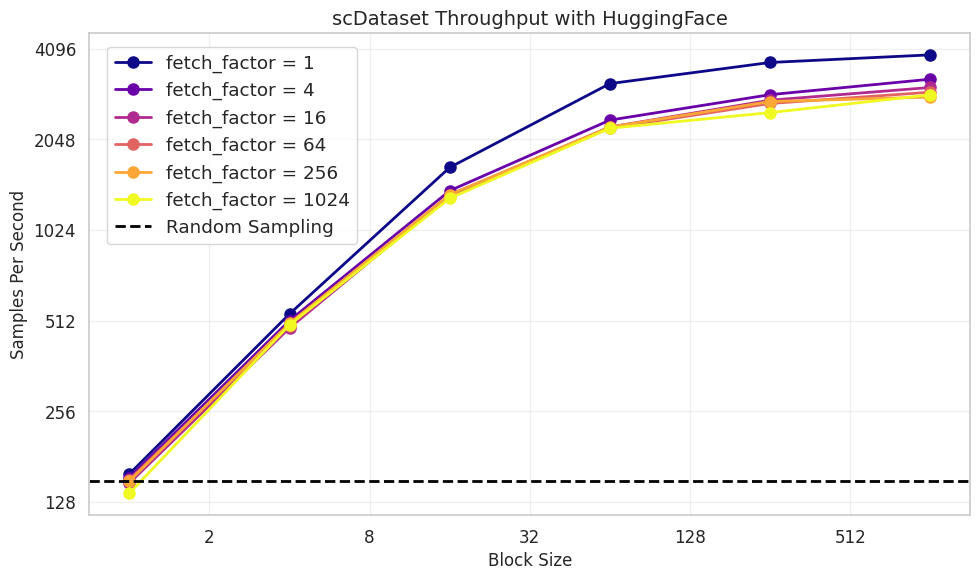

In [3]:
plot_throughput(
    csv_path='experiments/block_size_fetch_factor_eval_huggingface_random.csv',
    title='scDataset Throughput with HuggingFace',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    baseline_label='Random Sampling',
    save_path='figures/throughput_huggingface.pdf',
)

## 3. scDataset Throughput with BioNeMo

This plot shows the throughput of scDataset using BioNeMo's
SingleCellMemMapDataset compared to the baseline PyTorch DataLoader.

Figure saved to figures/throughput_bionemo.pdf


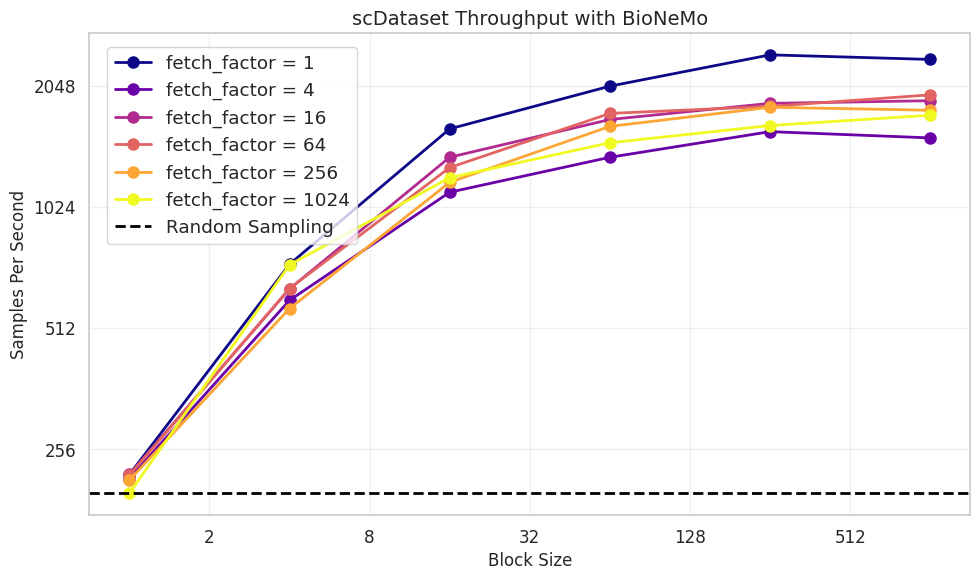

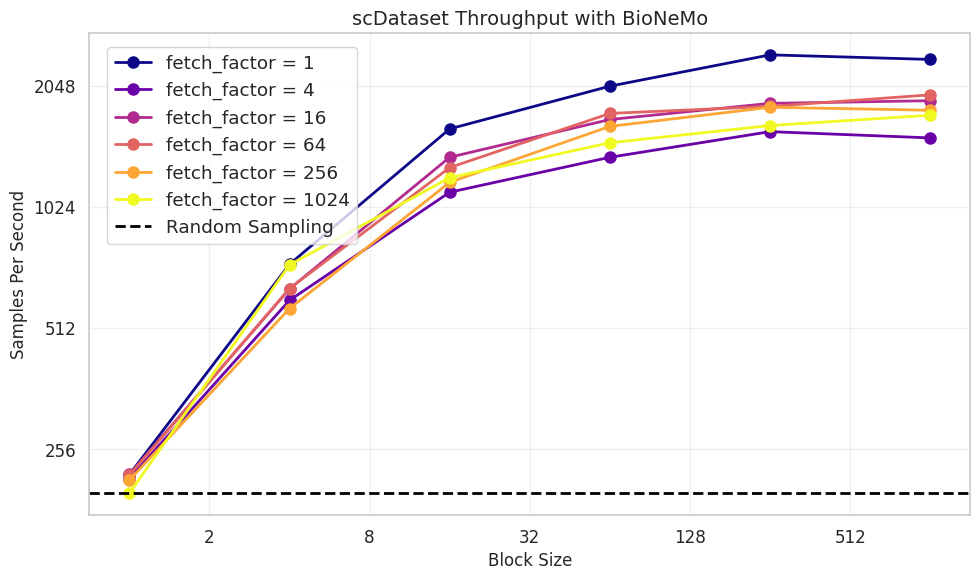

In [4]:
plot_throughput(
    csv_path='experiments/block_size_fetch_factor_eval_bionemo_random.csv',
    title='scDataset Throughput with BioNeMo',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    baseline_label='Random Sampling',
    save_path='figures/throughput_bionemo.pdf',
)

## 4. Batch Entropy Analysis (AnnData)

This plot shows the batch entropy (measuring how well samples from different
plates are mixed) for scDataset with different block sizes and fetch factors.
Higher entropy indicates better random mixing.

Note: Batch entropy is only computed for AnnData experiments where we have
the 'plate' metadata to measure cross-source mixing.

Figure saved to figures/batch_entropy_anndata.pdf


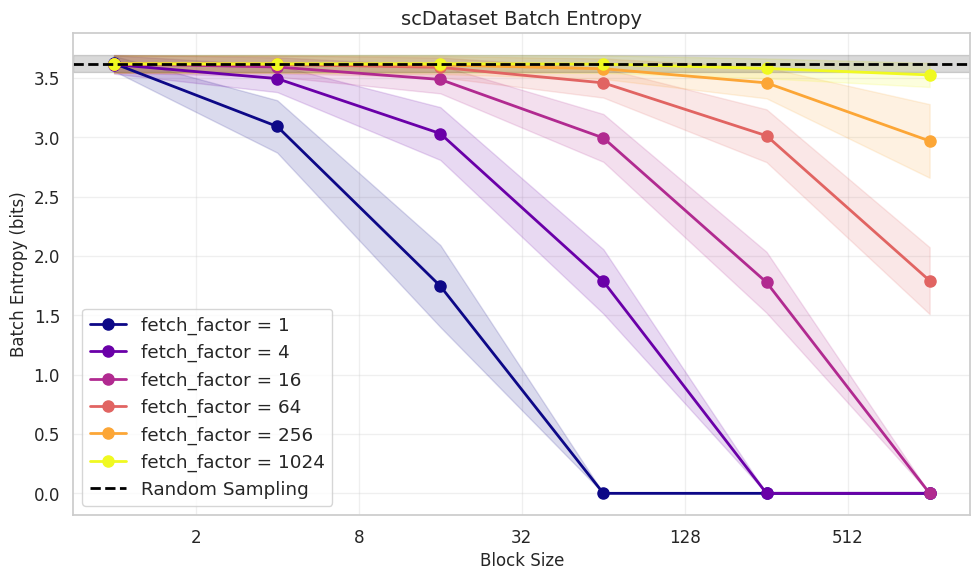

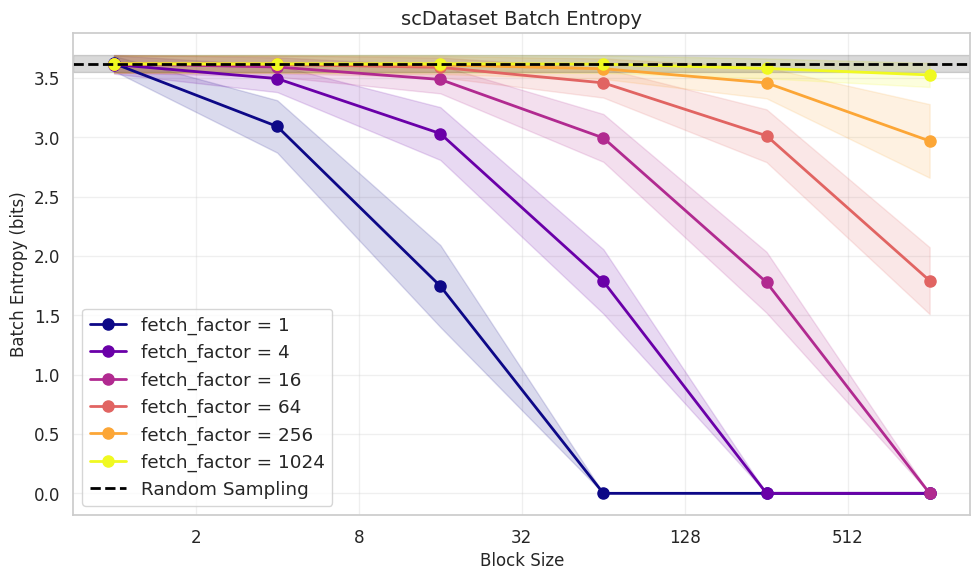

In [5]:
plot_batch_entropy(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    title='scDataset Batch Entropy',
    baseline_label='Random Sampling',
    color_map='plasma',
    save_path='figures/batch_entropy_anndata.pdf',
)

## Alternative: Using the General-Purpose Function

The `plot_block_size_by_fetch_factor` function is a more flexible option
that can create both throughput and entropy plots.

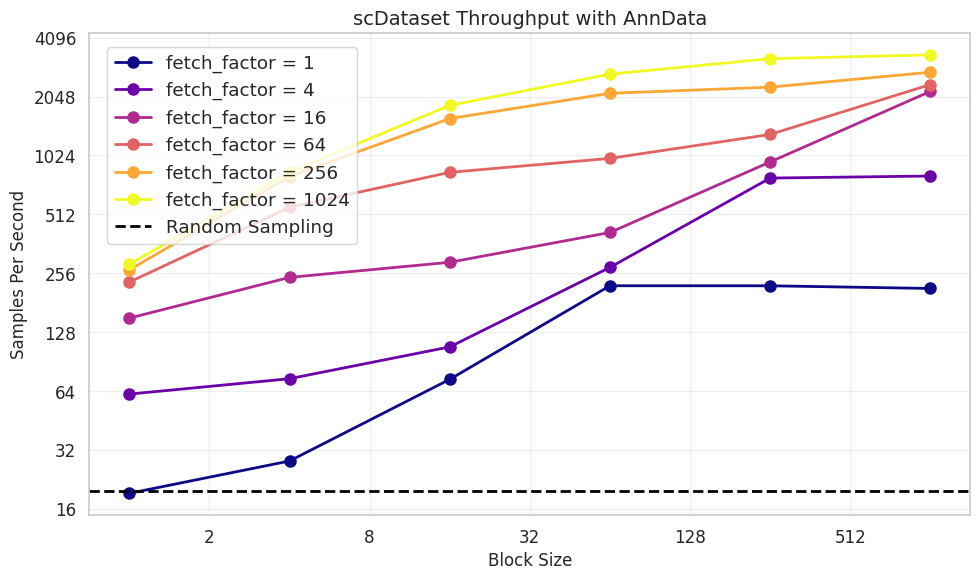

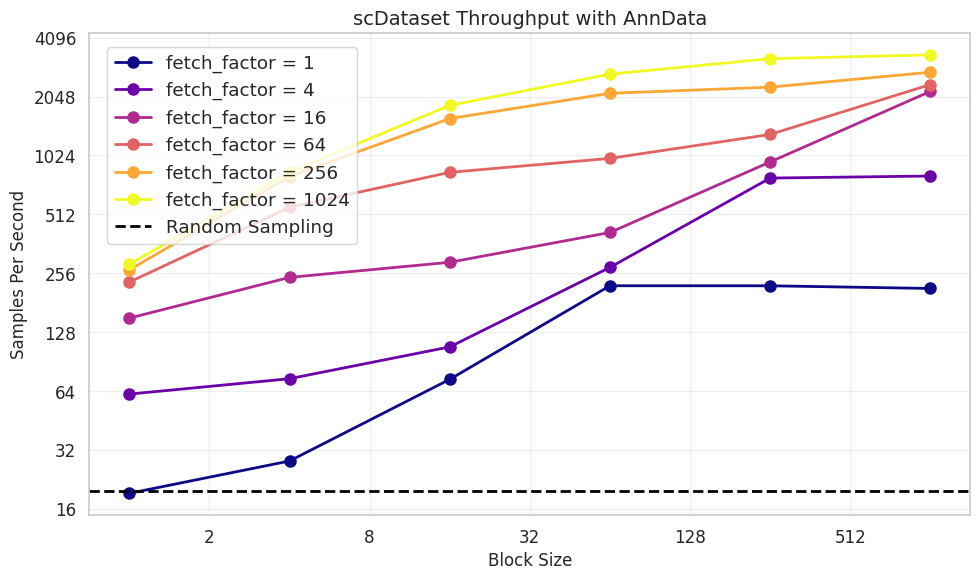

In [6]:
# Throughput plot with the general function
plot_block_size_by_fetch_factor(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    y_column='samples_per_second',
    y_label='Samples Per Second',
    plot_title='scDataset Throughput with AnnData',
    y_log_scale=True,
    x_log_scale=True,
    color_map='plasma',
    baseline_label='Random Sampling',
)

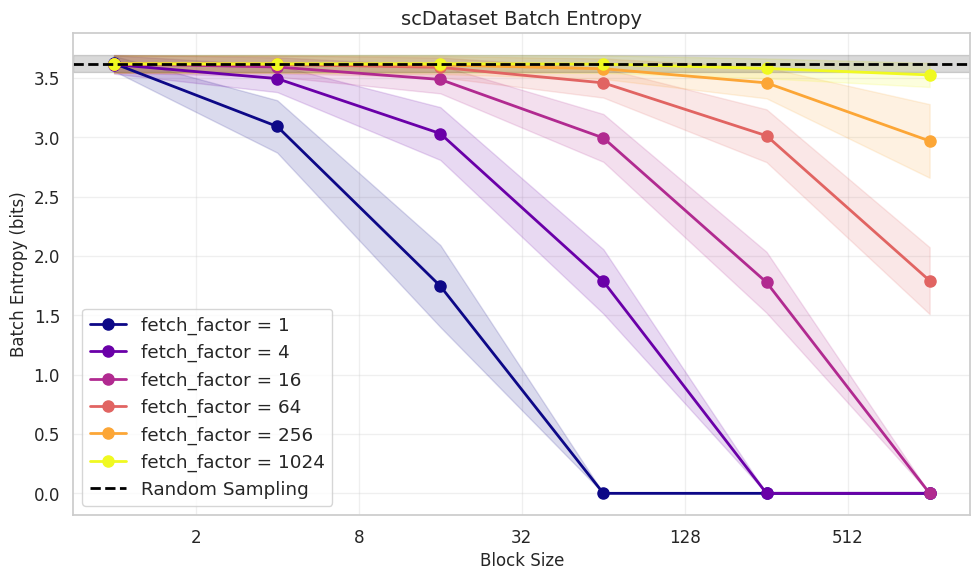

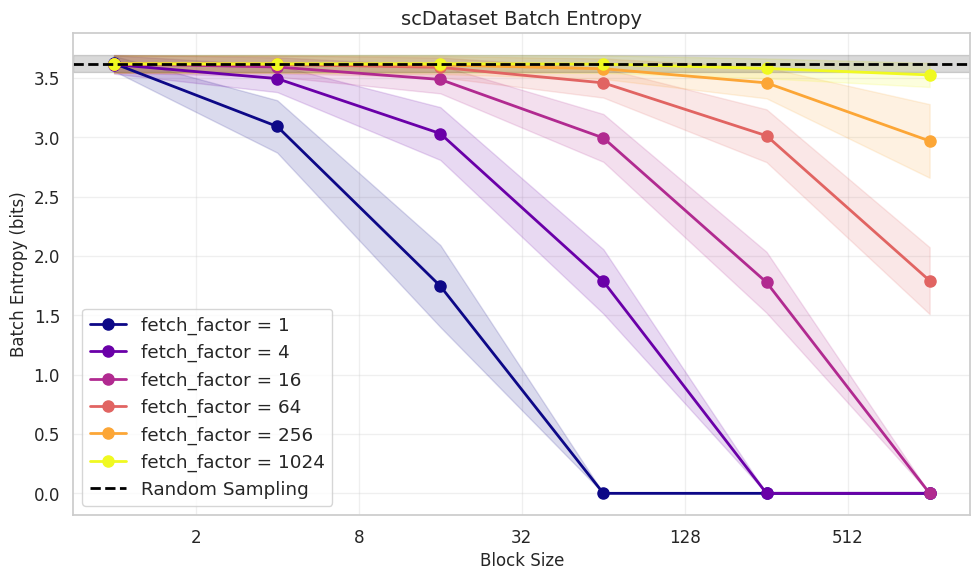

In [7]:
# Entropy plot with error bands
plot_block_size_by_fetch_factor(
    csv_path='experiments/block_size_fetch_factor_eval_anncollection_random.csv',
    y_column='avg_batch_entropy',
    y_label='Batch Entropy (bits)',
    plot_title='scDataset Batch Entropy',
    include_error_bars=True,
    error_column='std_batch_entropy',
    x_log_scale=True,
    color_map='plasma',
    baseline_label='Random Sampling',
)

## Generate All Plots at Once

Use this to generate all standard benchmark plots and save them to the figures directory.


Generating plots for AnnData...
Figure saved to figures/throughput_anndata.pdf
Figure saved to figures/batch_entropy_anndata.pdf

Generating plots for HuggingFace...
Figure saved to figures/throughput_huggingface.pdf

Generating plots for BioNeMo...
Figure saved to figures/throughput_bionemo.pdf

All plots saved to figures/


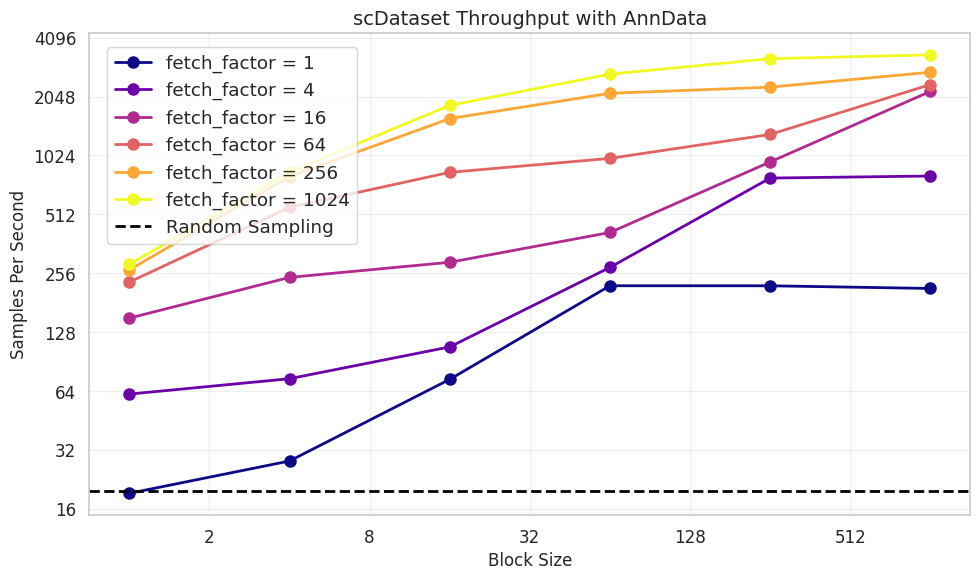

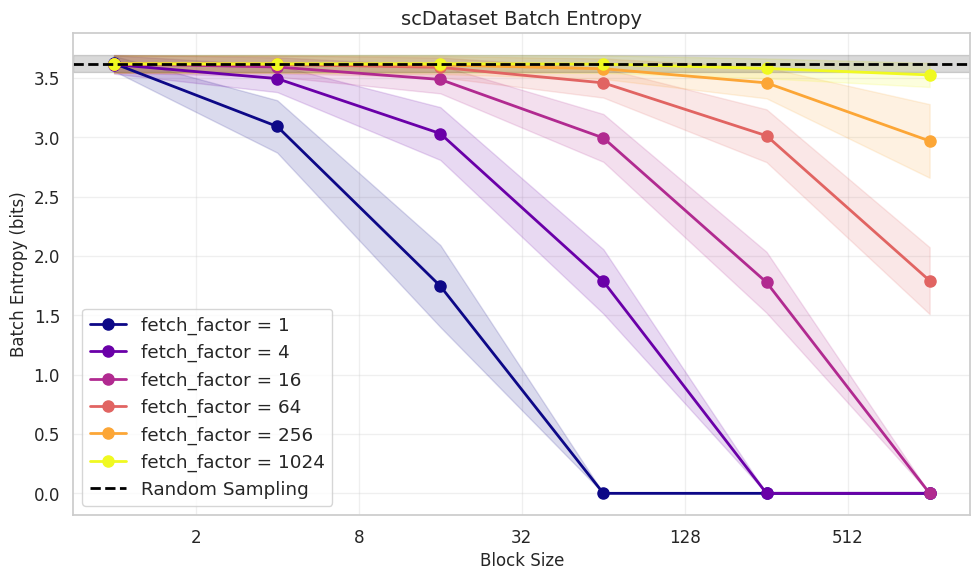

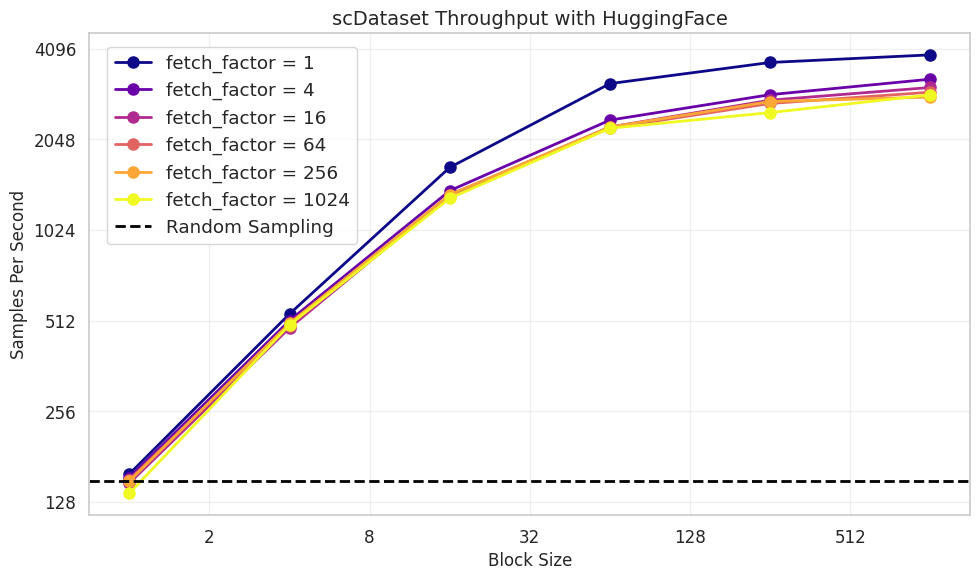

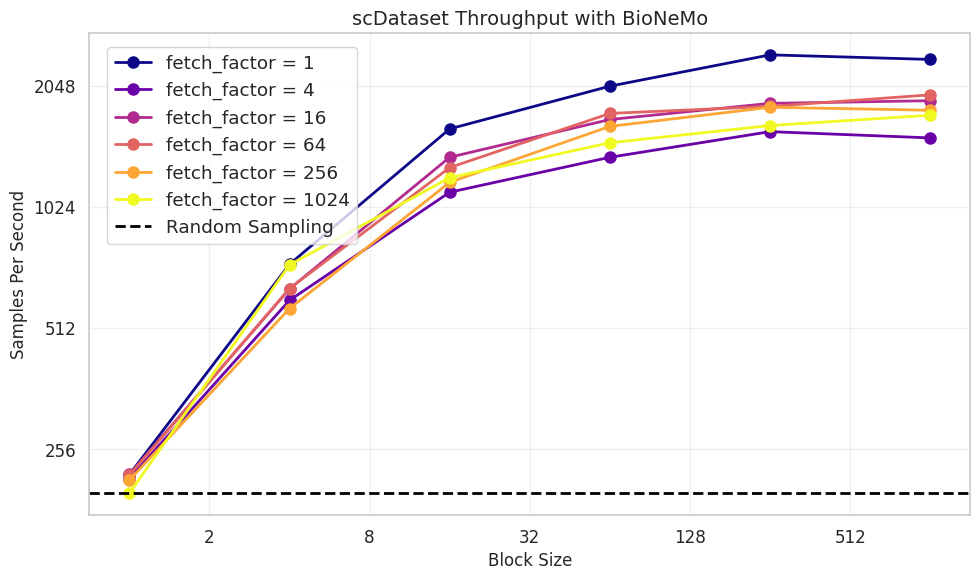

In [8]:
# Generate all plots and save to figures/
generate_all_benchmark_plots(
    experiments_dir='experiments',
    figures_dir='figures'
)